# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [3]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [4]:
np.__version__

'1.18.1'

In [5]:
pd.__version__

'1.0.1'

In [6]:
mat.__version__

'3.1.3'

In [7]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [8]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
iris_target_names = [iris.target_names[x] for x in iris.target]
iris_target_names

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [9]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df["target"] = iris_target_names

In [11]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df["target_num"] = iris.target

In [12]:
# Extraia as features (atributos) do dataset e imprima 
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target',
 'target_num']

In [13]:
# Calcule a média de cada feature para as 3 classes
medias = dict()
for classe in df.target.value_counts().index:
    aux = []
    dfaux = df[df.target==classe]
    for atributo in iris.feature_names:
        x = dfaux[atributo].mean()
        aux.append(x)
    medias[classe] = aux
df_medias = pd.DataFrame(medias)
df_medias = pd.DataFrame(np.array(df_medias.T),columns=iris.feature_names)
df_medias.index = df.target.value_counts().index
df_medias

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
versicolor,5.936,2.770,4.260,1.326
setosa,5.006,3.428,1.462,0.246
virginica,6.588,2.974,5.552,2.026


## Exploração de Dados

In [14]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
target,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
target_num,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [15]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
 5   target_num         150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
# Verifique se existem valores nulos no dataset
print(np.where(np.array(df.isna())==True))
print(np.array(df.isna()).any())

(array([], dtype=int64), array([], dtype=int64))
False


In [18]:
# Faça uma contagem de valores de sepal length
df["sepal length (cm)"].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

## Plot

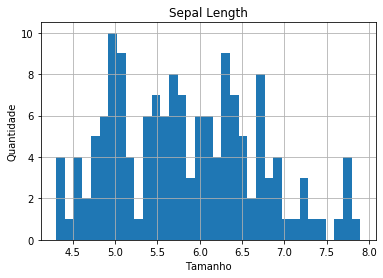

In [19]:
# Crie um Histograma de sepal length
df["sepal length (cm)"].hist(bins=len(df["sepal length (cm)"].value_counts()))
plt.xlabel("Tamanho")
plt.ylabel("Quantidade")
plt.title("Sepal Length")
plt.show()

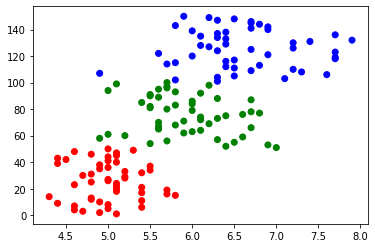

In [24]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target

x = np.array(df["sepal length (cm)"])
y = list(range(1,151)) 
cores = ["red","green","blue"]
colors = [cores[x] for x in df["target_num"]]

plt.scatter(x,y,color=colors)
plt.show()

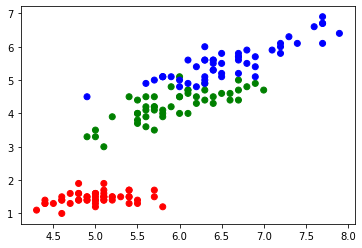

In [26]:
# Crie um Scatter Plot de 2 Features (atributos)
x = df["sepal length (cm)"]
y = df["petal length (cm)"]

plt.scatter(x,y,color=colors)
plt.show()


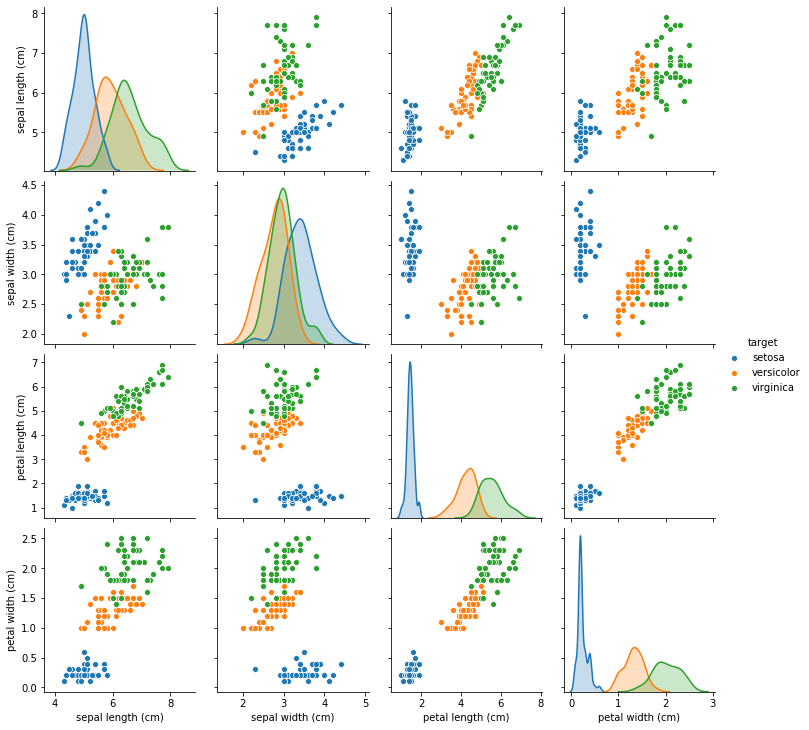

In [30]:
# Crie um Scatter Matrix das Features (atributos)
import seaborn as sns

sns.pairplot(df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","target"]],hue="target")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4161992910>,
      dtype=object)

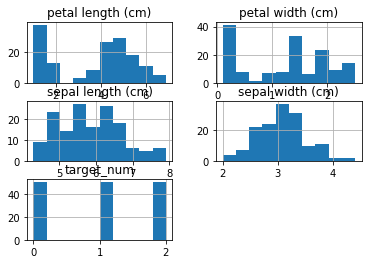

In [31]:
# Crie um Histograma de todas as features
df.hist()

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 400 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>